<a href="https://colab.research.google.com/github/Ayushparakh007/Gpt5_benchmark/blob/main/Introduction_to_SQL_sub_queries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to SQL Sub-Queries

This notebook explore the basics of the use of sub-queries with SQL

That's it, this code should be used as a complement to the article  

In [67]:
import pandas as pd

df = pd.read_csv('/content/GPT5_Real_Benchmark.csv')
display(df.head(10))

,user_id,task,difficulty,input_query,reference,context,target_tokens,eval_metric
0,strict_00000000,classification,easy,Label topic (World/Sports/Business/Sci/Tech): ...,Sports,NaN,32,accuracy
1,strict_00000001,translation,medium,"Translate to German: 'As I informed Mr Davies,...","Wie ich Herrn Davies bereits sagte, verspreche...",NaN,128,bleu
2,strict_00000002,summarization,medium,Summarize in 2-3 sentences: (CNN) -- Launched ...,The Airbus A330-200 was launched in 1995 . The...,NaN,128,rouge
3,strict_00000003,summarization,medium,Summarize in 2-3 sentences: (CNN) -- Naval for...,European Union forces may have spotted couple'...,NaN,128,rouge
4,strict_00000004,summarization,medium,Summarize in 2-3 sentences: (CNN) -- Three yea...,"Tom Hanks stars in ""Angels & Demons,"" a sequel...",NaN,128,rouge
5,strict_00000005,reasoning_short,hard,"Bill thought he bought 70 chihuahuas, but some...",Let r be the number of rats and c be the numbe...,NaN,256,rubric
6,strict_00000006,summarization,medium,"Summarize in 2-3 sentences: LOS ANGELES, Calif...",Tiburon is low-slung sportster that won't bust...,NaN,128,rouge
7,strict_00000007,summarization,medium,"Summarize in 2-3 sentences: Okaloosa Island, F...",Florida's Emerald Coast on a Sunday is picture...,NaN,128,rouge
8,strict_00000008,translation,medium,Translate to German: 'I wonder whether he can ...,"Ich wüßte gern, ob sich seiner Meinung nach se...",NaN,128,bleu
9,strict_00000009,classification,easy,Label topic (World/Sports/Business/Sci/Tech): ...,Sci/Tech,NaN,32,accuracy


Here are some ways to analyze the `df` DataFrame using pandas:

In [24]:
# Count the number of records for each task category
task_counts = df['task'].value_counts()
print("Task Category Counts:")
print(task_counts)

Task Category Counts:
task
classification           10312
qa_factoid               10290
translation              10177
summarization             9693
reasoning_short           6469
instruction_following     2145
Name: count, dtype: int64


This code counts the occurrences of each unique value in the 'task' column.

In [25]:
# Count the number of records for each difficulty level
difficulty_counts = df['difficulty'].value_counts()
print("\nDifficulty Level Counts:")
print(difficulty_counts)


Difficulty Level Counts:
difficulty
medium    32305
easy      10312
hard       6469
Name: count, dtype: int64


This code counts the occurrences of each unique value in the 'difficulty' column.

In [26]:
# Count the number of records for each evaluation metric
metric_counts = df['eval_metric'].value_counts()
print("\nEvaluation Metric Counts:")
print(metric_counts)


Evaluation Metric Counts:
eval_metric
accuracy       12457
exact_match    10290
bleu           10177
rouge           9693
rubric          6469
Name: count, dtype: int64


This code counts the occurrences of each unique value in the 'eval_metric' column.

In [27]:
# Find the average target tokens for each task
# Convert 'target_tokens' to numeric, coercing errors
df['target_tokens'] = pd.to_numeric(df['target_tokens'], errors='coerce')
average_target_tokens_by_task = df.groupby('task')['target_tokens'].mean().sort_values(ascending=False)
print("\nAverage Target Tokens by Task:")
print(average_target_tokens_by_task)


Average Target Tokens by Task:
task
reasoning_short          256.0
summarization            128.0
translation              128.0
instruction_following     64.0
qa_factoid                64.0
classification            32.0
Name: target_tokens, dtype: float64


/tmp/ipython-input-689132025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_target_tokens_by_task.index, y=average_target_tokens_by_task.values, palette='viridis')


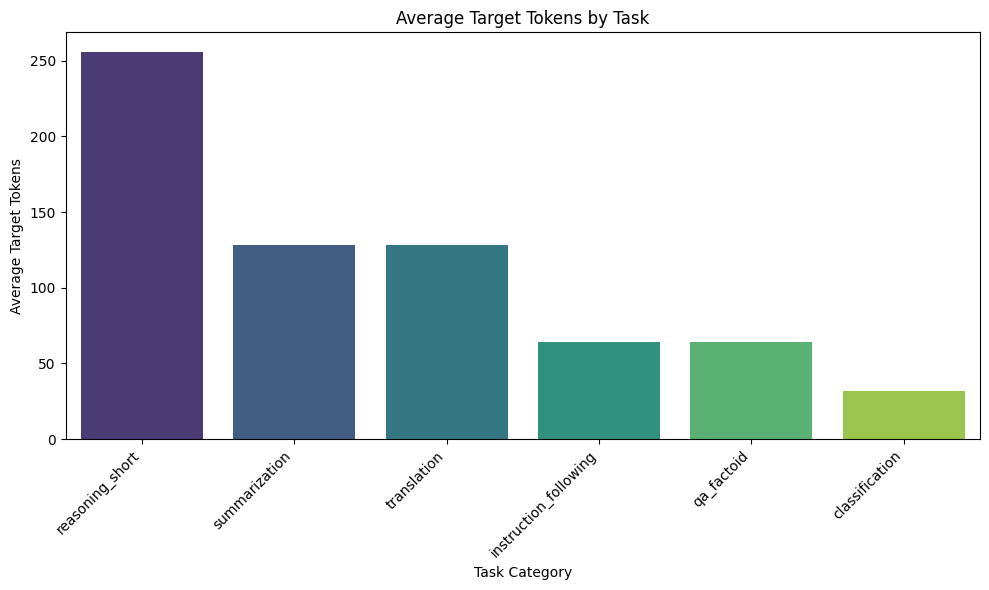

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming average_target_tokens_by_task is already calculated and available
# If not, you would need to run the code cell that calculates it first:
# average_target_tokens_by_task = df.groupby('task')['target_tokens'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_target_tokens_by_task.index, y=average_target_tokens_by_task.values, palette='viridis')
plt.title('Average Target Tokens by Task')
plt.xlabel('Task Category')
plt.ylabel('Average Target Tokens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This code calculates the average of the 'target_tokens' column for each task category after converting the column to a numeric type.

In [28]:
# Find the average target tokens for each difficulty level
average_target_tokens_by_difficulty = df.groupby('difficulty')['target_tokens'].mean().sort_values(ascending=False)
print("\nAverage Target Tokens by Difficulty:")
print(average_target_tokens_by_difficulty)


Average Target Tokens by Difficulty:
difficulty
hard      256.000000
medium    103.364804
easy       32.000000
Name: target_tokens, dtype: float64


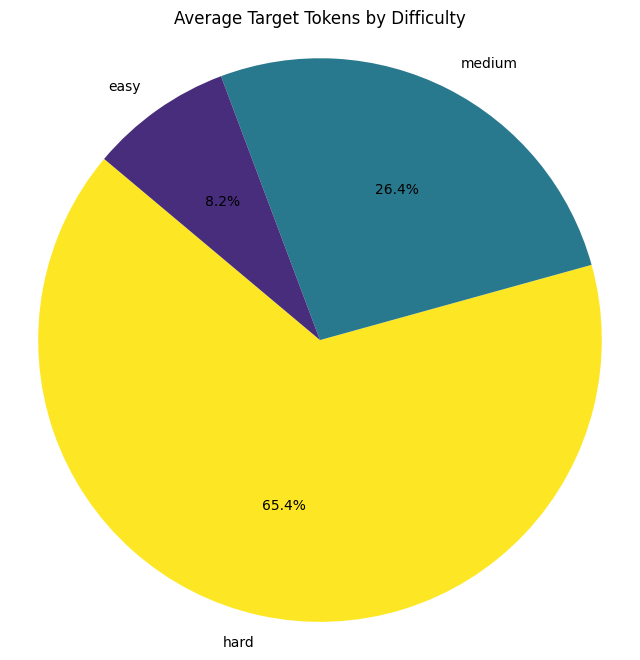

This code calculates the average of the 'target_tokens' column for each difficulty level.

In [29]:
# Find the most common evaluation metric for each task
most_common_metric_by_task = df.groupby('task')['eval_metric'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
print("\nMost Common Evaluation Metric by Task:")
print(most_common_metric_by_task)


Most Common Evaluation Metric by Task:
task
classification              accuracy
instruction_following       accuracy
qa_factoid               exact_match
reasoning_short               rubric
summarization                  rouge
translation                     bleu
Name: eval_metric, dtype: object


This code finds the most frequent evaluation metric for each task category.

In [30]:
# Count entries where context is not null or empty
context_filled_count = df['context'].count() # count non-null entries
print(f"\nNumber of entries with context: {context_filled_count}")


Number of entries with context: 10290


This code counts the number of non-null entries in the 'context' column.

In [31]:
# Count entries where reference is not null or empty
reference_filled_count = df['reference'].count() # count non-null entries
print(f"\nNumber of entries with reference: {reference_filled_count}")


Number of entries with reference: 49086


This code counts the number of non-null entries in the 'reference' column.

Here are more Python code snippets to analyze the `df` DataFrame:

In [32]:
# Analyze the relationship between difficulty and evaluation metric
difficulty_metric_counts = df.groupby(['difficulty', 'eval_metric']).size().unstack(fill_value=0)
print("\nEvaluation Metric Counts by Difficulty:")
display(difficulty_metric_counts)


Evaluation Metric Counts by Difficulty:


eval_metric,accuracy,bleu,exact_match,rouge,rubric
difficulty,,,,,
easy,10312,0,0,0,0
hard,0,0,0,0,6469
medium,2145,10177,10290,9693,0


This code groups the data by difficulty and evaluation metric to show how metrics are distributed across difficulty levels.

In [33]:
# Analyze the relationship between task and difficulty
task_difficulty_counts = df.groupby(['task', 'difficulty']).size().unstack(fill_value=0)
print("\nDifficulty Level Counts by Task:")
display(task_difficulty_counts)


Difficulty Level Counts by Task:


difficulty,easy,hard,medium
task,,,
classification,10312,0,0
instruction_following,0,0,2145
qa_factoid,0,0,10290
reasoning_short,0,6469,0
summarization,0,0,9693
translation,0,0,10177


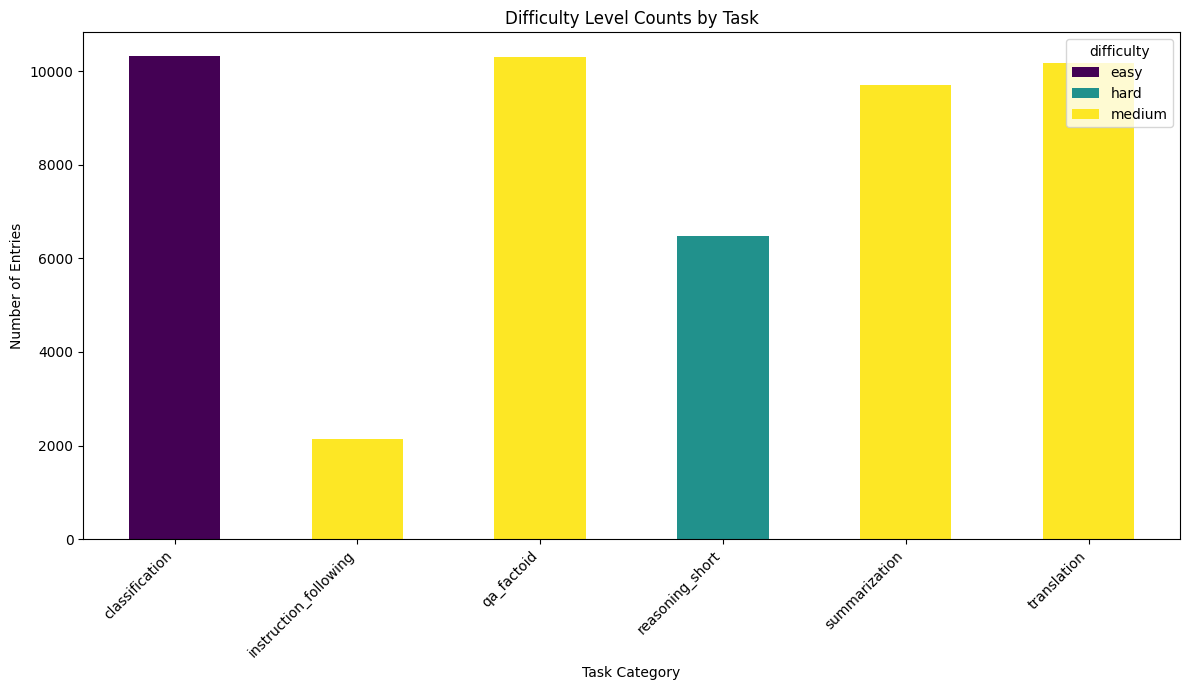

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming task_difficulty_counts is already calculated and available
# If not, you would need to run the code cell that calculates it first:
# task_difficulty_counts = df.groupby(['task', 'difficulty']).size().unstack(fill_value=0)

task_difficulty_counts.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Difficulty Level Counts by Task')
plt.xlabel('Task Category')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This code groups the data by task and difficulty to show the distribution of difficulty levels within each task category.

This code calculates the average target tokens for each combination of task and evaluation metric.

In [35]:
# Filter data for a specific task (e.g., 'reasoning_short') and analyze difficulty distribution
reasoning_tasks = df[df['task'] == 'reasoning_short']
reasoning_difficulty_counts = reasoning_tasks['difficulty'].value_counts()
print("\nDifficulty Distribution for 'reasoning_short' tasks:")
print(reasoning_difficulty_counts)


Difficulty Distribution for 'reasoning_short' tasks:
difficulty
hard    6469
Name: count, dtype: int64


This code filters the DataFrame to include only 'reasoning_short' tasks and then shows the distribution of difficulty levels within this subset. You can change 'reasoning_short' to another task.

In [36]:
# Filter data for 'hard' difficulty and analyze task distribution
hard_tasks = df[df['difficulty'] == 'hard']
hard_task_counts = hard_tasks['task'].value_counts()
print("\nTask Distribution for 'hard' difficulty:")
print(hard_task_counts)


Task Distribution for 'hard' difficulty:
task
reasoning_short    6469
Name: count, dtype: int64


This code filters the DataFrame to include only 'hard' difficulty tasks and then shows the distribution of task categories within this subset. You can change 'hard' to 'easy' or 'medium'.

In [37]:
# Count entries where both context and reference are not null or empty
both_filled_count = df.dropna(subset=['context', 'reference']).shape[0]
print(f"\nNumber of entries with both context and reference: {both_filled_count}")


Number of entries with both context and reference: 10290


This code counts the number of entries where both the 'context' and 'reference' columns have non-null values.

In [38]:
# Find the unique values in the 'task' column
unique_tasks = df['task'].unique()
print("\nUnique Task Categories:")
print(unique_tasks)


Unique Task Categories:
['classification' 'translation' 'summarization' 'reasoning_short'
 'instruction_following' 'qa_factoid']


This code lists all the unique values present in the 'task' column.

In [39]:
# Find the unique values in the 'eval_metric' column
unique_metrics = df['eval_metric'].unique()
print("\nUnique Evaluation Metrics:")
print(unique_metrics)


Unique Evaluation Metrics:
['accuracy' 'bleu' 'rouge' 'rubric' 'exact_match']


This code lists all the unique values present in the 'eval_metric' column.

Here are more Python code snippets for analyzing performance variance, particularly across difficulty levels:

In [40]:
# Analyze the distribution of evaluation metrics for each difficulty level
difficulty_metric_distribution = df.groupby('difficulty')['eval_metric'].value_counts().unstack(fill_value=0)
print("\nDistribution of Evaluation Metrics by Difficulty:")
display(difficulty_metric_distribution)


Distribution of Evaluation Metrics by Difficulty:


eval_metric,accuracy,bleu,exact_match,rouge,rubric
difficulty,,,,,
easy,10312,0,0,0,0
hard,0,0,0,0,6469
medium,2145,10177,10290,9693,0


This code shows how the different evaluation metrics are distributed within each difficulty level.

In [41]:
# Compare the average target tokens across different difficulty levels
# This was already calculated and is available in the 'average_target_tokens_by_difficulty' variable
print("\nAverage Target Tokens by Difficulty (revisiting):")
print(average_target_tokens_by_difficulty)


Average Target Tokens by Difficulty (revisiting):
difficulty
hard      256.000000
medium    103.364804
easy       32.000000
Name: target_tokens, dtype: float64


This code revisits the average target tokens by difficulty, which gives an indication of the expected output length for each difficulty level.

In [42]:
# Analyze the relationship between task, difficulty, and evaluation metric
task_difficulty_metric_counts = df.groupby(['task', 'difficulty', 'eval_metric']).size().unstack(fill_value=0)
print("\nEvaluation Metric Counts by Task and Difficulty:")
display(task_difficulty_metric_counts)


Evaluation Metric Counts by Task and Difficulty:


,eval_metric,accuracy,bleu,exact_match,rouge,rubric
task,difficulty,,,,,
classification,easy,10312,0,0,0,0
instruction_following,medium,2145,0,0,0,0
qa_factoid,medium,0,0,10290,0,0
reasoning_short,hard,0,0,0,0,6469
summarization,medium,0,0,0,9693,0
translation,medium,0,10177,0,0,0


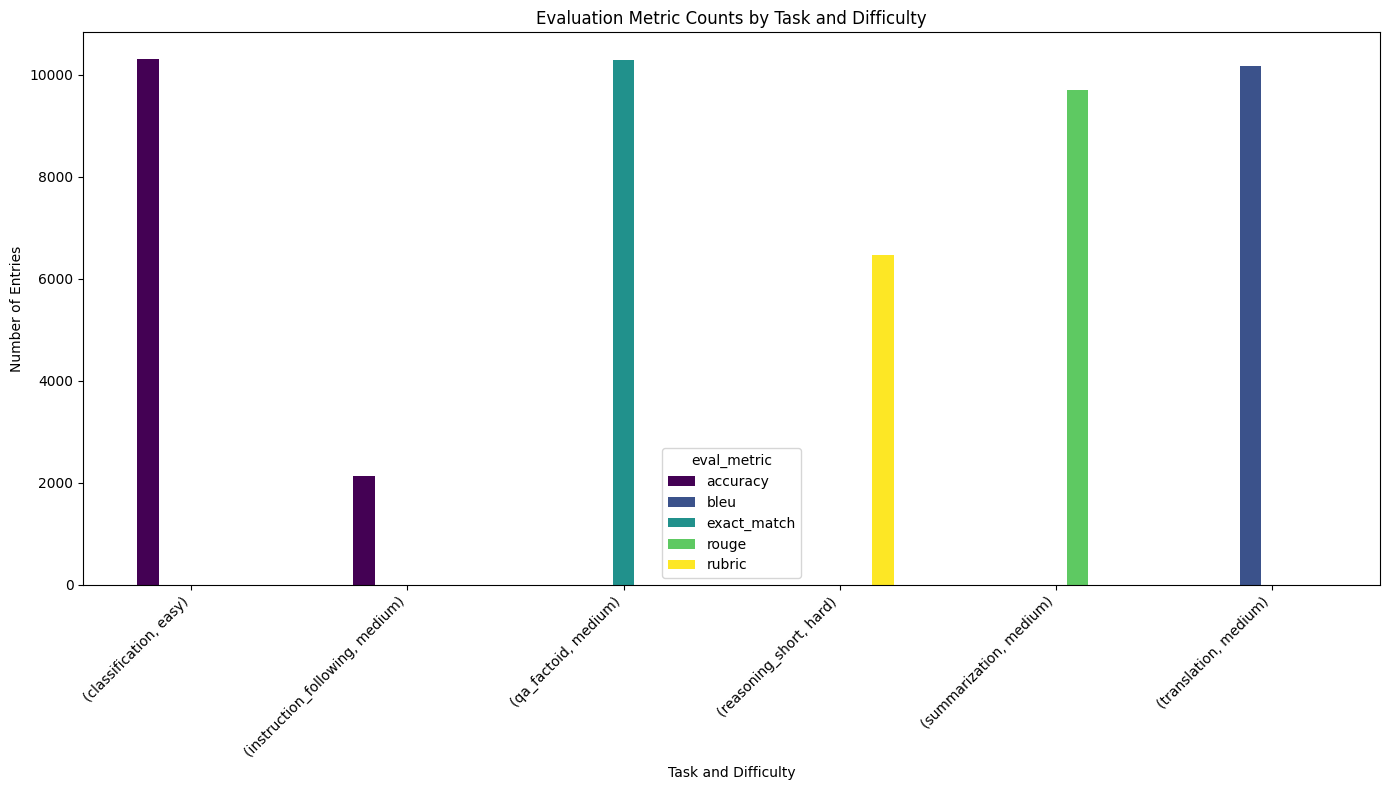

This code shows the counts of each evaluation metric for each combination of task and difficulty.

In [43]:
# Analyze target token distribution by difficulty using describe()
target_tokens_by_difficulty_describe = df.groupby('difficulty')['target_tokens'].describe()
print("\nTarget Token Distribution by Difficulty:")
display(target_tokens_by_difficulty_describe)


Target Token Distribution by Difficulty:


,count,mean,std,min,25%,50%,75%,max
difficulty,,,,,,,,
easy,10312.0,32.000000,0.000000,32.0,32.0,32.0,32.0,32.0
hard,6469.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
medium,32305.0,103.364804,31.141446,64.0,64.0,128.0,128.0,128.0


/tmp/ipython-input-525780051.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='difficulty', y='target_tokens', data=df, palette='viridis', order=['easy', 'medium', 'hard'])


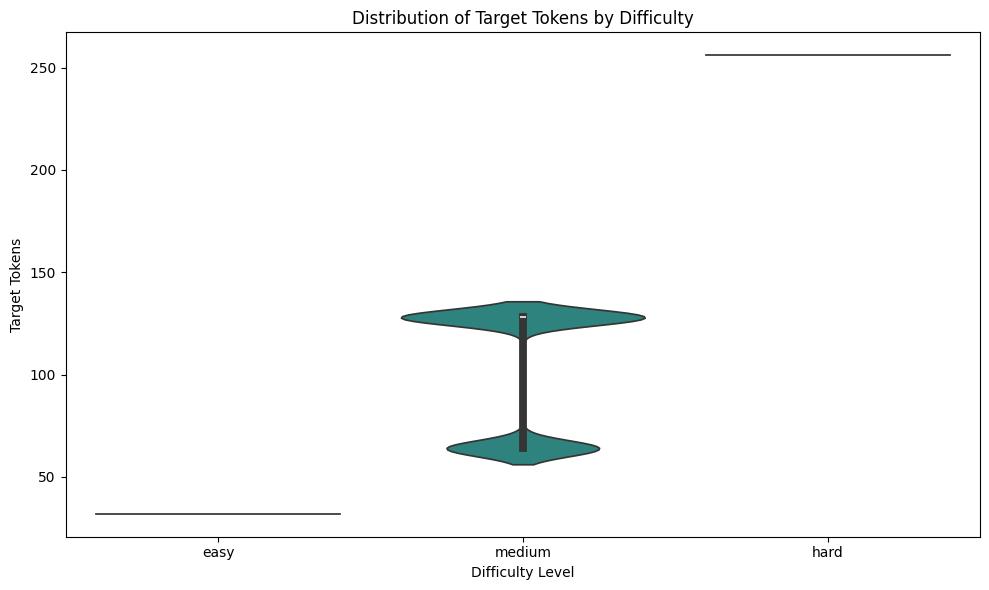

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is loaded and 'target_tokens' and 'difficulty' columns are available

plt.figure(figsize=(10, 6))
sns.violinplot(x='difficulty', y='target_tokens', data=df, palette='viridis', order=['easy', 'medium', 'hard'])
plt.title('Distribution of Target Tokens by Difficulty')
plt.xlabel('Difficulty Level')
plt.ylabel('Target Tokens')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

This code provides descriptive statistics (count, mean, std, min, max, quartiles) for target tokens within each difficulty level.

In [55]:
# Filter data for a specific difficulty and task combination (e.g., 'hard' and 'reasoning_short')
hard_reasoning_tasks = df[(df['difficulty'] == 'hard') & (df['task'] == 'reasoning_short')]
print(f"\nNumber of 'hard' and 'reasoning_short' tasks: {len(hard_reasoning_tasks)}")
display(hard_reasoning_tasks.head())


Number of 'hard' and 'reasoning_short' tasks: 6469


,user_id,task,difficulty,input_query,reference,context,target_tokens,eval_metric,input_query_length,reference_length,context_length
5,strict_00000005,reasoning_short,hard,"Bill thought he bought 70 chihuahuas, but some...",Let r be the number of rats and c be the numbe...,NaN,256,rubric,163,336,3
20,strict_00000020,reasoning_short,hard,Alani earned $45 for 3 hours of baby-sitting. ...,The rate is $45/3=$<<45/3=15>>15/hr. She would...,NaN,256,rubric,122,102,3
48,strict_00000048,reasoning_short,hard,Fred wants to order a variety pack of sliced m...,The variety pack costs $40.00 and rush shippin...,NaN,256,rubric,244,329,3
63,strict_00000063,reasoning_short,hard,Mark is baking bread. He has to let it rise fo...,First find the total rise time: 120 minutes * ...,NaN,256,rubric,201,208,3
66,strict_00000066,reasoning_short,hard,James can make 4 hats out of one yard of velve...,First find the total amount of velvet James us...,NaN,256,rubric,155,336,3


This code filters the DataFrame to show entries for a specific difficulty and task combination. You can change 'hard' and 'reasoning_short' to other values.

In [56]:
# Find the most common eval_metric for each difficulty level
most_common_metric_by_difficulty = df.groupby('difficulty')['eval_metric'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
print("\nMost Common Evaluation Metric by Difficulty:")
print(most_common_metric_by_difficulty)


Most Common Evaluation Metric by Difficulty:
difficulty
easy         accuracy
hard           rubric
medium    exact_match
Name: eval_metric, dtype: object


This code finds the most frequent evaluation metric for each difficulty level.

In [57]:
# Analyze the relationship between eval_metric and target_tokens
eval_metric_target_tokens_describe = df.groupby('eval_metric')['target_tokens'].describe()
print("\nTarget Token Distribution by Evaluation Metric:")
display(eval_metric_target_tokens_describe)


Target Token Distribution by Evaluation Metric:


,count,mean,std,min,25%,50%,75%,max
eval_metric,,,,,,,,
accuracy,12457.0,37.510155,12.082006,32.0,32.0,32.0,32.0,64.0
bleu,10177.0,128.000000,0.000000,128.0,128.0,128.0,128.0,128.0
exact_match,10290.0,64.000000,0.000000,64.0,64.0,64.0,64.0,64.0
rouge,9693.0,128.000000,0.000000,128.0,128.0,128.0,128.0,128.0
rubric,6469.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0


This code provides descriptive statistics for target tokens within each evaluation metric.

In [47]:
# Count the number of unique input queries
unique_input_queries_count = df['input_query'].nunique()
print(f"\nNumber of unique input queries: {unique_input_queries_count}")


Number of unique input queries: 49071


This code counts the number of unique values in the 'input_query' column.

In [48]:
# Find the average target tokens for each task and filter for a minimum number of entries
average_target_tokens_by_task_filtered = df.groupby('task')['target_tokens'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print("\nAverage Target Tokens by Task (with count):")
display(average_target_tokens_by_task_filtered)


Average Target Tokens by Task (with count):


,mean,count
task,,
reasoning_short,256.0,6469
summarization,128.0,9693
translation,128.0,10177
instruction_following,64.0,2145
qa_factoid,64.0,10290
classification,32.0,10312


This code calculates the average target tokens and the count of entries for each task, showing how many data points contribute to the average.

In [49]:
# Analyze the length of input queries by difficulty
df['input_query_length'] = df['input_query'].str.len()
average_input_query_length_by_difficulty = df.groupby('difficulty')['input_query_length'].mean().sort_values(ascending=False)
print("\nAverage Input Query Length by Difficulty:")
print(average_input_query_length_by_difficulty)


Average Input Query Length by Difficulty:
difficulty
medium    891.704287
easy      289.642164
hard      234.164322
Name: input_query_length, dtype: float64


This code calculates the average length of the input queries for each difficulty level.

In [50]:
# Analyze the length of reference text by difficulty (handling potential NaNs)
df['reference_length'] = df['reference'].astype(str).str.len()
average_reference_length_by_difficulty = df.groupby('difficulty')['reference_length'].mean().sort_values(ascending=False)
print("\nAverage Reference Length by Difficulty:")
print(average_reference_length_by_difficulty)


Average Reference Length by Difficulty:
difficulty
hard      288.637811
medium    138.635536
easy        6.790535
Name: reference_length, dtype: float64


This code calculates the average length of the reference text for each difficulty level, converting to string to handle potential missing values.

In [51]:
# Analyze the length of context text by difficulty (handling potential NaNs)
df['context_length'] = df['context'].astype(str).str.len()
average_context_length_by_difficulty = df.groupby('difficulty')['context_length'].mean().sort_values(ascending=False)
print("\nAverage Context Length by Difficulty:")
print(average_context_length_by_difficulty)


Average Context Length by Difficulty:
difficulty
medium    224.517629
easy        3.000000
hard        3.000000
Name: context_length, dtype: float64


This code calculates the average length of the context text for each difficulty level, converting to string to handle potential missing values.

In [52]:
# Count entries with and without context
context_counts = df['context'].notna().value_counts()
print("\nEntries with and without Context:")
print(context_counts)


Entries with and without Context:
context
False    38796
True     10290
Name: count, dtype: int64


This code counts how many entries have non-null context.

In [53]:
# Count entries with and without reference
reference_counts = df['reference'].notna().value_counts()
print("\nEntries with and without Reference:")
print(reference_counts)


Entries with and without Reference:
reference
True    49086
Name: count, dtype: int64


This code counts how many entries have non-null reference.

In [54]:
# Find the average target tokens for entries with and without context
average_target_tokens_by_context = df.groupby(df['context'].notna())['target_tokens'].mean()
print("\nAverage Target Tokens based on presence of Context:")
print(average_target_tokens_by_context)


Average Target Tokens based on presence of Context:
context
False    120.287865
True      64.000000
Name: target_tokens, dtype: float64


This code calculates the average target tokens for entries that have context and those that do not.